# Florentine Families

# Comparing  valuess of the 𝑝-centrality function with values of other centrality measures and the percentage of the differences


In [1]:
from mygraph import MyGraph
from helpers import *

In [2]:
# Building the graph 
nxg = nx.florentine_families_graph()

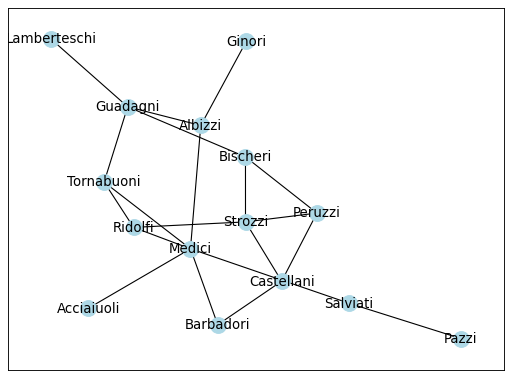

In [3]:
# drawing the graph
dg(nxg) # , pos='kamada')

In [4]:
closeness = nx.closeness_centrality(nxg)
closeness

{'Acciaiuoli': 0.3684210526315789,
 'Medici': 0.56,
 'Castellani': 0.3888888888888889,
 'Peruzzi': 0.3684210526315789,
 'Strozzi': 0.4375,
 'Barbadori': 0.4375,
 'Ridolfi': 0.5,
 'Tornabuoni': 0.4827586206896552,
 'Albizzi': 0.4827586206896552,
 'Salviati': 0.3888888888888889,
 'Pazzi': 0.2857142857142857,
 'Bischeri': 0.4,
 'Guadagni': 0.4666666666666667,
 'Ginori': 0.3333333333333333,
 'Lamberteschi': 0.32558139534883723}

In [5]:
# copying the graph into a MyGraph object
myg = copy_nx_graph(nxg)

In [6]:
def p_centrality(myg, p, radius, scaling_factor):
    """
    myg: a MyGraph object 
    p: a real number 0 < p < 1
    radius: the maxinum radius of circles around a node that are used to compute the p-centrality function
    scaling_factor: the scaling factor to make the p-centrality function comparable with closeness centrality
    returns: a dictionary whose keys are the nodes of the graph and the values are the p-centrality function of the corresponding node
    """
    ppc = {}
    for node in myg.get_vertex_list():
        circles = myg.circles(node, radius=radius)
        val = 0
        for i in range(radius):
            if i + 1 <= len(circles) - 1:
                val += len(circles[i+1])* p**i
        ppc[node] = val/scaling_factor
    return ppc

In [7]:
ppc = p_centrality(myg, 0.6, 5, 17.96)
errors = []
for x in ppc.keys():
    diff_percecntage = abs(ppc[x]-closeness[x])/closeness[x]
    errors.append(diff_percecntage)
    print(f" {x:<{12}} =>   c: {round(closeness[x], 3):<{7}}  p: {round(ppc[x], 3):<{7}} error: {round(100 * diff_percecntage, 3):<{5}} %")
    print("--------------------------------------------")
print("average error: ", round((100 * sum(errors))/len(errors), 3), "%")

 Acciaiuoli   =>   c: 0.368    p: 0.359   error: 2.552 %
--------------------------------------------
 Medici       =>   c: 0.56     p: 0.561   error: 0.223 %
--------------------------------------------
 Castellani   =>   c: 0.389    p: 0.404   error: 3.773 %
--------------------------------------------
 Peruzzi      =>   c: 0.368    p: 0.391   error: 6.057 %
--------------------------------------------
 Strozzi      =>   c: 0.438    p: 0.461   error: 5.275 %
--------------------------------------------
 Barbadori    =>   c: 0.438    p: 0.437   error: 0.019 %
--------------------------------------------
 Ridolfi      =>   c: 0.5      p: 0.494   error: 1.114 %
--------------------------------------------
 Tornabuoni   =>   c: 0.483    p: 0.481   error: 0.35  %
--------------------------------------------
 Albizzi      =>   c: 0.483    p: 0.481   error: 0.35  %
--------------------------------------------
 Salviati     =>   c: 0.389    p: 0.395   error: 1.483 %
-------------------------